In [1]:
import sys
sys.path.append('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/')
import numpy as np
import matplotlib.pyplot as plt
import Hyperparam_Testing.Testing_Notebooks.Common_Functions as cf 

from tensorflow.keras import models 


import matplotlib
matplotlib.rcParams.update({'font.size': 16})
matplotlib.rcParams.update({'text.usetex': True})
matplotlib.rcParams.update({'text.usetex': True})
matplotlib.rcParams.update({'mathtext.fontset': 'cm'})


In [2]:
data = cf.gen_and_load(10**7,10**5)
train_x ,train_y = data[0]
val_x,val_y = data[1]

In [3]:
model = models.load_model('/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/Hyperparam_Testing/Testing_Notebooks/Optimised_Network/5_107.0datapoints.h5')
v_nn = model.predict(train_x)[:,0]

2022-02-20 11:35:22.167317: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-20 11:35:22.171122: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-20 11:35:22.171379: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-02-20 11:35:22.171926: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

In [60]:
dir ='/home/sean/Documents/Work/Level 4/Level-4-Masters-Project/Figures/Analytics_Figs'

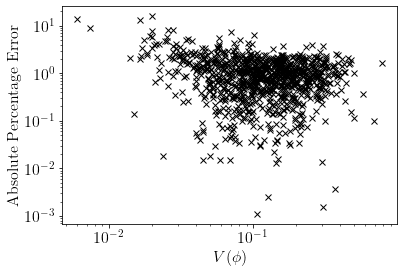

In [81]:
ape = abs((v_nn-train_y)/train_y)


fig , ax = plt.subplots(1)
ax.loglog(train_y[:10**3],ape[:10**3]*100, marker = 'x', c = 'black',linestyle = '')
ax.set_ylabel('Absolute Percentage Error')
ax.set_xlabel('$V(\phi)$')
ext = 'ape.png'
path = os.path.join(dir,ext)
fig.savefig(path,dpi = 300, transparent= False)

In [62]:
cutoff = 0.25
fraction  = len(np.where(train_y>cutoff)[0])
print('Fraction of Data with $V(\phi)>{}$ = {}'.format(cutoff,fraction/train_y.shape[0]))

Fraction of Data with $V(\phi)>0.25$ = 0.12331343434343435


In [63]:
cutoffs = np.linspace(0,1,100)
fraction_mape = []
for i in cutoffs:
    index = np.where(train_y>i)
    fraction_mape.append(np.mean(abs((v_nn[index]-train_y[index])/train_y[index]))*100)

In [64]:
fractions = []
for i in cutoffs:
    fraction = len(train_y[np.where(train_y>i)])/train_y.shape[0]
    fractions.append(fraction)

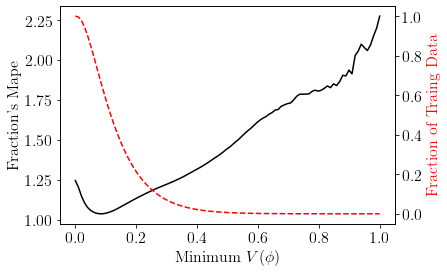

In [65]:
fig, ax = plt.subplots(1)
ax2 = ax.twinx()
ax2.plot(cutoffs,fractions, 'r--')
ax.plot(cutoffs,fraction_mape, c = 'black')
ax.set_ylabel('Fraction\'s Mape')
ax.set_xlabel('Minimum $V(\phi)$')
ax2.set_ylabel('Fraction of Traing Data',c = 'red')
best_cut = float(cutoffs[np.argmin(fraction_mape)])
ext = 'minvphi.png'
path = os.path.join(dir,ext)
fig.savefig(path,dpi = 300, transparent= False)

In [73]:
Upper_cut = np.linspace(best_cut+0.02,1.4,100)
train_y_2 = train_y[np.where(train_y>best_cut)]
v_nn_2 = v_nn[np.where(train_y>best_cut)]
fraction_mape = []
fractions = []
for i in Upper_cut:
    index = [train_y_2<i]
    fractions.append(len(train_y_2[index])/train_y.shape[0])  
    fraction_mape.append(np.mean(abs((v_nn_2[index]-train_y_2[index])/train_y_2[index]))*100)

/tmp/ipykernel_534066/420550681.py:8: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  fractions.append(len(train_y_2[index])/train_y.shape[0])
/tmp/ipykernel_534066/420550681.py:9: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  fraction_mape.append(np.mean(abs((v_nn_2[index]-train_y_2[index])/train_y_2[index]))*100)


In [67]:
fraction_mape =np.nan_to_num(fraction_mape,0)

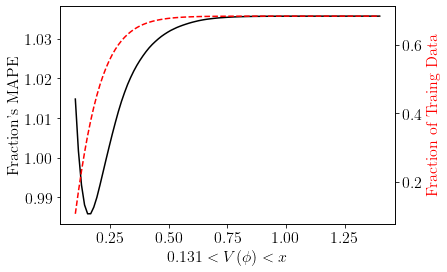

In [74]:
fig, ax = plt.subplots(1)
ax2 = ax.twinx()
ax2.plot(Upper_cut,fractions, 'r--')
ax.plot(Upper_cut,fraction_mape,c = 'black')
ax.set_ylabel('Fraction\'s MAPE')
ax2.set_ylabel('Fraction of Traing Data')
ax.set_xlabel('${} < V(\phi)< x $'.format(round(best_cut+0.05,3)))
ax2.set_ylabel('Fraction of Traing Data',c = 'red')
ext = 'minmaxvphi.png'
path = os.path.join(dir,ext)
fig.savefig(path,dpi = 300, transparent= False)

In [69]:
optimum_cut = round(Upper_cut[np.argmin(fraction_mape)],2)
print('Optimised MAPE on the interval $0.2<V(\phi)<{}$'.format(optimum_cut))
optimum_fraction = len(train_y[np.where(train_y_2<optimum_cut)])/train_y.shape[0]
print('Fraction of the data in optimum interval = {}'.format(optimum_fraction))

Optimised MAPE on the interval $0.2<V(\phi)<0.15$
Fraction of the data in optimum interval = 0.3231309090909091


In [75]:
std = np.std(train_x[:,:8],axis = 1)
std.shape
eunorm = np.sum(train_x[:,:8]**2,axis = 1)

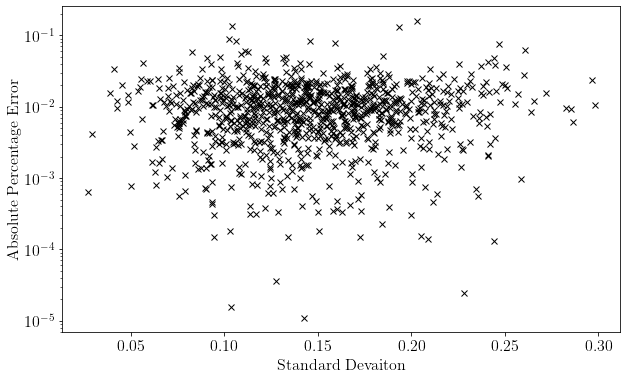

In [79]:
fig , ax = plt.subplots(1,figsize =(10,6))
ax.semilogy(std[:10**3],ape[:10**3],linestyle = '', marker = 'x', c = 'black')
ax.set_xlabel('Standard Devaiton')
ax.set_ylabel('Absolute Percentage Error')
ext = 'std.png'
path = os.path.join(dir,ext)
fig.savefig(path,dpi = 300, transparent= False)

Suggests stadard deviaiton and APE have no correlation. which is frankly annoying. 

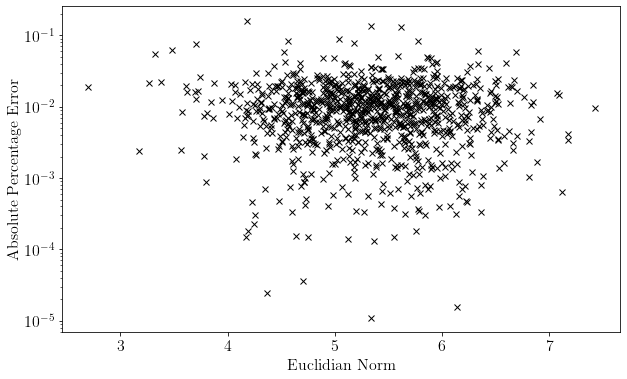

In [77]:
fig , ax = plt.subplots(1,figsize =(10,6))
ax.semilogy(eunorm[:10**3],ape[:10**3],linestyle = '', marker = 'x', c = 'black')
ax.set_xlabel('Euclidian Norm')
ax.set_ylabel('Absolute Percentage Error')
ext = 'eunorm.png'
path = os.path.join(dir,ext)
fig.savefig(path,dpi = 300, transparent= False)